<h1><center>IST707 Data Analytics</center></h1>
<h2><center>HW3: NBC, KNN, SVM, and Ensemble Learning</center></h2>
<h3><center>Pranav Kottoli Radhakrishna, April 5th 2020</center></h3>

## Introduction

**The purpose of this assignment is to predict whether a patient has a disease based on biological information about the patient such as age and height. We will exlore and process the data in order to prepare it to be used to train machine learning algorithms. This is a binary classification problem. Therefore we will use a number of classification algorithms to make the prediction. We have a training dataset to train the machine learning algorithms and a testing dataset in order to test the predictions made by the algorithms.**

## Executive Summary

**We start the asignment by performing feature engineering by adding a new attribute(Body Mass Index). We proceed by performing Exploratory Data analysis where we look at missing values, outliers, correlation and patterns in the data through a combination of visualization and statistical analysis. This is followed by data preparation where we handle outliers and other anomalies that are present in the data. We also scale and one hot encode the data in order to prepare it for our machine learning algorithms**

**Next, we model our data using different classification algorithms and decision tree based ensemble learning techniques. We use K Nearest Neighbors,Naive Bayes, Random Forest, Gradient Boosting, Linear SVM and Non Linear SVM. We then apply majority voting to these algorithms to see if the combination of algorithms can provide better results.**

**Finally, we make predictions on the test dataset and export the outcomes to a csv file**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import svm
%matplotlib inline

In [2]:
plt.style.use('seaborn-bright')

## Import the Data

In [3]:
df = pd.read_csv("Disease Prediction Training(1).csv")

In [4]:
df_testing = pd.read_csv("Disease Prediction Testing(1).csv")

# Data Preparation

**Let's start of by adding the attribute body mass index(BMI) to the dataset. BMI can be calculated from height and weight using the formula:**

$$ w / h^2$$

**Where w is in kilograms and h is in metres. We can see further down that the new attribute has a relatively strong correlation with the target variable**

In [5]:
df['BMI'] = df['Weight']/((df['Height']/100)**2)

In [6]:
df_testing['BMI'] = df_testing['Weight']/((df_testing['Height']/100)**2)

## Exploratory Data Analysis

In [7]:
df.head()

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease,BMI
0,59,female,167,88.0,130,68,normal,normal,0,0,1,0,31.553659
1,64,female,150,71.0,140,100,normal,normal,0,0,0,1,31.555556
2,41,female,166,83.0,100,70,normal,normal,0,1,1,0,30.120482
3,50,male,172,110.0,130,80,normal,normal,1,0,1,0,37.182261
4,39,female,162,61.0,110,80,high,high,0,0,1,0,23.243408


In [8]:
df.describe()

,Age,Height,Weight,High Blood Pressure,Low Blood Pressure,Smoke,Alcohol,Exercise,Disease,BMI
count,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000
mean,52.853306,164.366878,74.190527,128.698939,96.917367,0.088265,0.054245,0.803204,0.499959,27.550049
std,6.763065,8.216637,14.329934,147.624582,200.368069,0.283683,0.226503,0.397581,0.500005,6.067360
min,29.000000,55.000000,10.000000,-150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,26.397977
75%,58.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,30.163746
max,64.000000,207.000000,200.000000,14020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [9]:
df.corr()

,Age,Height,Weight,High Blood Pressure,Low Blood Pressure,Smoke,Alcohol,Exercise,Disease,BMI
Age,1.000000,-0.077621,0.054611,0.024186,0.015983,-0.050065,-0.028419,-0.011579,0.239784,0.086350
Height,-0.077621,1.000000,0.291676,0.002917,0.005524,0.186391,0.093549,-0.007061,-0.011022,-0.296359
Weight,0.054611,0.291676,1.000000,0.031973,0.041933,0.063138,0.061883,-0.017145,0.181836,0.756235
High Blood Pressure,0.024186,0.002917,0.031973,1.000000,0.016065,-0.000820,0.001555,0.002153,0.053667,0.027014
Low Blood Pressure,0.015983,0.005524,0.041933,0.016065,1.000000,0.005267,0.012807,0.002568,0.060944,0.033772
Smoke,-0.050065,0.186391,0.063138,-0.000820,0.005267,1.000000,0.337435,0.026082,-0.014579,-0.031568
Alcohol,-0.028419,0.093549,0.061883,0.001555,0.012807,0.337435,1.000000,0.026081,-0.004486,0.008615
Exercise,-0.011579,-0.007061,-0.017145,0.002153,0.002568,0.026082,0.026081,1.000000,-0.035202,-0.014548
Disease,0.239784,-0.011022,0.181836,0.053667,0.060944,-0.014579,-0.004486,-0.035202,1.000000,0.165530
BMI,0.086350,-0.296359,0.756235,0.027014,0.033772,-0.031568,0.008615,-0.014548,0.165530,1.000000


In [10]:
df.shape

(49000, 13)

### Search for missing values

**The dataset contains no missing values**

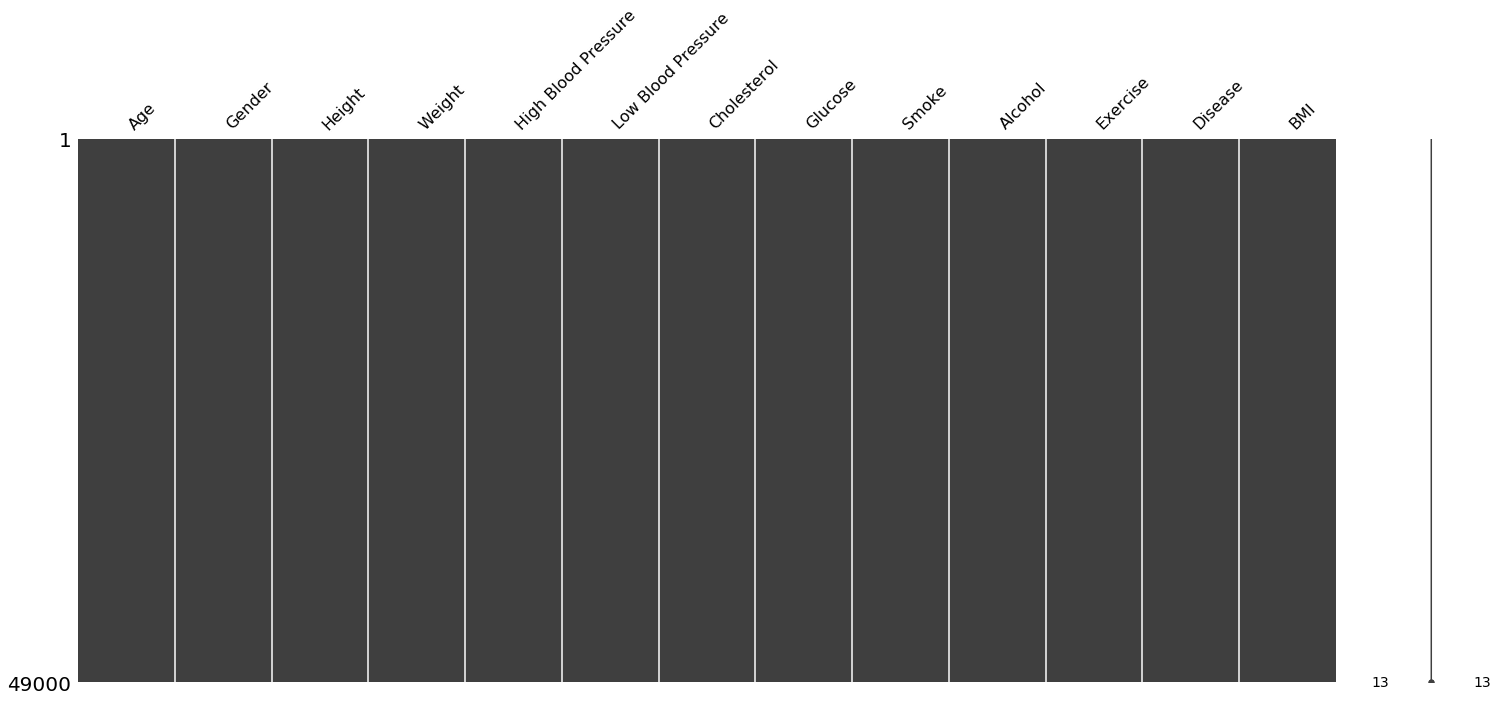

In [11]:
mn.matrix(df)
plt.show()

In [12]:
df.isna().sum().sum()

0

### Let's Visualize the data

In [13]:
def plot_dist_grid(row,col,cols):
    
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(12,10))
    i = 0
    for ax in axes.flatten():
        sns.distplot(df[cols[i]],ax= ax,kde = False)
        i += 1
    
    # Display the figure object    
    fig
    plt.tight_layout()

In [14]:
def plot_count_grid(row,col,cols):
    
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(12,10))
    i = 0
    for ax in axes.flatten():
        sns.countplot(x = cols[i],ax= ax,data = df)
        i += 1
    
    # Display the figure object    
    fig
    plt.tight_layout()

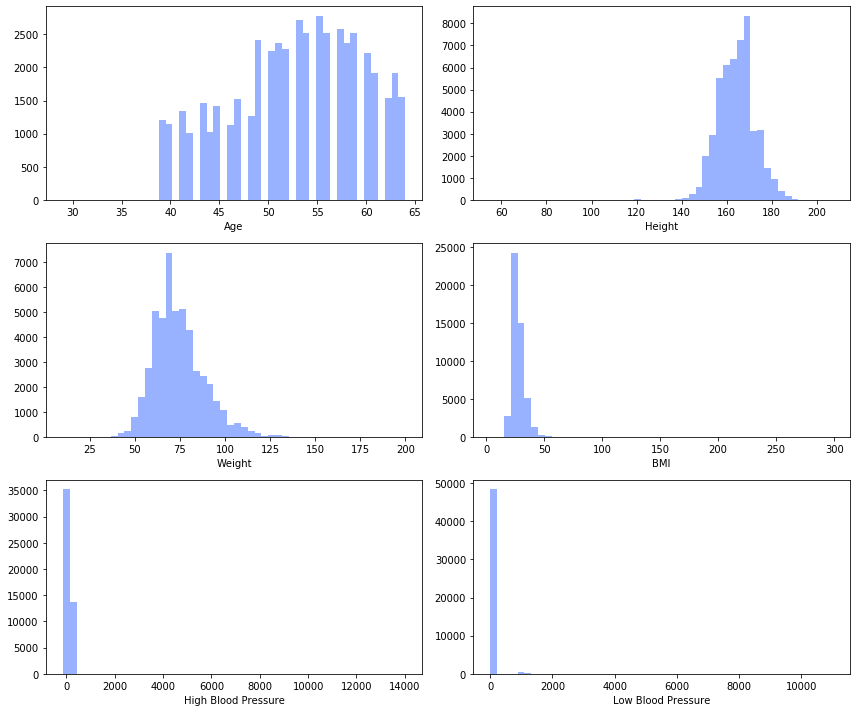

In [15]:
plot_dist_grid(3,2,['Age','Height','Weight','BMI','High Blood Pressure','Low Blood Pressure'])

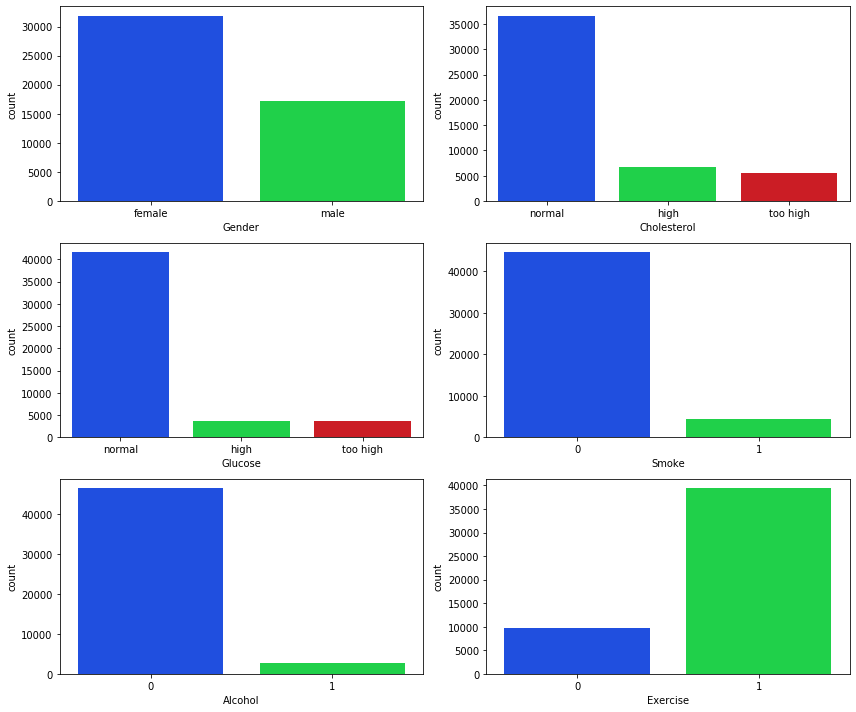

In [16]:
plot_count_grid(3,2,['Gender','Cholesterol','Glucose','Smoke','Alcohol','Exercise'])

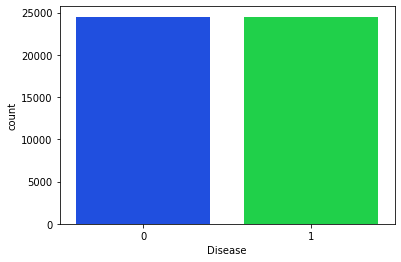

In [17]:
sns.countplot('Disease',data = df)

### Handling Outliers

**Some attributes like Low Blood Pressure, High Blood Pressure and BMI contain outliers. We deal with this by winsorizing these attributes. The value to which the outliers are winsorized is based on domain knowledge**

In [18]:
def winsorize(data,column,upper,lower):
    for j, val in enumerate(column):
        Q1 = np.quantile(data[val],0.25)
        Q3 = np.quantile(data[val],0.75)
        IQR = Q3-Q1

        upper_bound = Q3 + (1.5 * IQR)
        lower_bound = Q1 - (1.5 * IQR)

        high_outliers = data[val][data[val] > upper_bound]
        low_outliers  = data[val][data[val] < lower_bound]

        upper_value = np.quantile(data[val],upper[j])
        lower_value = np.quantile(data[val],lower[j])

        for i in high_outliers.index:
            data.at[i,val] = upper_value

        for i in low_outliers.index:
            data.at[i,val] = lower_value
    
    return data

In [19]:
df = winsorize(df,['Low Blood Pressure','High Blood Pressure','BMI'],[0.986,0.998,0.97],[0.01,0.01,0.001])

In [20]:
df_testing = winsorize(df_testing,['Low Blood Pressure','High Blood Pressure','BMI'],[0.9855,0.998,0.97],[0.01,0.01,0.001])

**We find that the value of low blood pressure is higher than high blood pressure in some of the rows. We handle this by reversing the values**

In [21]:
ind = df[df['Low Blood Pressure'] > df['High Blood Pressure']].index
high = df['High Blood Pressure'].iloc[ind]
low  = df['Low Blood Pressure'].iloc[ind]
for i in ind:
    df.at[i,'High Blood Pressure'] = df['Low Blood Pressure'].iloc[i]
    df.at[i,'Low Blood Pressure']  = df['High Blood Pressure'].iloc[i]

In [22]:
ind = df_testing[df_testing['Low Blood Pressure'] > df_testing['High Blood Pressure']].index
high = df_testing['High Blood Pressure'].iloc[ind]
low  = df_testing['Low Blood Pressure'].iloc[ind]
for i in ind:
    df_testing.at[i,'High Blood Pressure'] = df_testing['Low Blood Pressure'].iloc[i]
    df_testing.at[i,'Low Blood Pressure']  = df_testing['High Blood Pressure'].iloc[i]

### Handle Duplicates

**The dataset contains some duplicate values. These can be dropped**

In [23]:
df[df.duplicated()].head()

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease,BMI
1278,40,female,156,65.0,110,80,normal,normal,0,0,1,0,26.709402
1581,56,female,160,60.0,120,80,normal,normal,0,0,1,1,23.437500
1901,54,female,170,80.0,120,80,normal,normal,0,0,1,0,27.681661
2412,41,female,162,65.0,110,70,normal,normal,0,0,1,0,24.767566
3027,56,female,169,70.0,120,80,normal,normal,0,0,1,0,24.508946


In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df_testing.drop_duplicates(inplace=True)

### One hot encoding

**Certain algorithms like K Nearest Neighbors cannot have categorical variables. In order to deal with this we create dummy variables**

In [26]:
def create_dummies(data,col_list):
    
    for col_name in col_list:
        
        drop_first = False
        if len(data[col_name].value_counts().index) == 2:
            drop_first = True
            
        tempdf = pd.get_dummies(data[col_name],drop_first = drop_first)
        
        if not drop_first:
            tempdf.columns = [col_name +'_' + str(col) for col in tempdf.columns]
        else:
            tempdf.columns = [col_name]
            
        data = data.drop(col_name,axis = 1).join(tempdf)
        
    return data

In [27]:
df_one_hot = create_dummies(df,['Gender','Glucose','Cholesterol'])

In [28]:
df_test_one_hot = create_dummies(df_testing,['Gender','Glucose','Cholesterol'])

### Let's scale the data

**Since K Nearest Neighbors and Support Vector Machines are both distance based algorithms, we have to scale the data**

In [29]:
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_one_hot)
df_normalized = pd.DataFrame(np_scaled, columns=df_one_hot.columns, index=df_one_hot.index)

standard_scaler = StandardScaler()
np_scaled = standard_scaler.fit_transform(df_one_hot.drop('Disease',axis = 1))

df_standardized = pd.DataFrame(np_scaled, columns=df_one_hot.drop('Disease',axis = 1).columns, index=df_one_hot.drop('Disease',axis = 1).index)
df_standardized['Disease'] = df_one_hot['Disease']

In [30]:
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_test_one_hot.drop('ID',axis = 1))
df_test_normalized = pd.DataFrame(np_scaled, columns=df_test_one_hot.drop('ID',axis = 1).columns, index=df_test_one_hot.drop('ID',axis = 1).index)
df_test_normalized['ID'] = df_test_one_hot['ID']

standard_scaler = StandardScaler()
np_scaled = standard_scaler.fit_transform(df_test_one_hot.drop('ID',axis = 1))

df_test_standardized = pd.DataFrame(np_scaled, columns=df_test_one_hot.drop('ID',axis = 1).columns, index=df_test_one_hot.drop('ID',axis = 1).index)
df_test_standardized['ID'] = df_test_one_hot['ID']

# Data Modeling

**The evaluation metric to be optimized are recall and accuracy. It's important to mininimize False Negatives, since it's better to predict that the patient has the disease and have that be false than to predict that they don't and have someone go undiagnosed**

**Let's create a function to plot an ROC and calculate the AUC**

In [31]:
def generate_roc(model,y_test,model_name):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('{}: ROC AUC=%.3f'.format(model_name) % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.figure(figsize=(16,8))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

## K Nearest Neighbor (KNN)

**The baseline model for K Nearest Neighbor has an accuracy of 0.69 and a recall of 0.70**

In [32]:
X = df_normalized.drop('Disease',axis = 1)
y = df_normalized['Disease']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
pred = neigh.predict(X_test)

In [36]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69      6992
         1.0       0.70      0.70      0.70      7183

    accuracy                           0.69     14175
   macro avg       0.69      0.69      0.69     14175
weighted avg       0.69      0.69      0.69     14175

Accuracy Score:  0.6931922398589065
Recall Score:  0.6988723374634553


Predicted,0.0,1.0,All
True,,,
0.0,4806,2186,6992
1.0,2163,5020,7183
All,6969,7206,14175


## Optimization

**The following grid search returns the hyperparameters which provide the best results with a recall of 0.71 and an accuracy of 0.73**

**The hyperparameters tuned are**
- **n_neighbors: The numberof nearest neighbors to use when making a classification**
- **weights: Determines the weight assigned to each of the neighbors**
- **algorithm: Determines the algorithm to be used to compute the nearest neighbors**
- **p: The degree of the minckowski distance function**

In [347]:
param_grid = {'n_neighbors': list(range(16,28)),
              'weights': ['uniform','distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
gs = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy',cv = 6,n_jobs = 2,verbose = 1)
gs.fit(X_train, y_train)

Fitting 6 folds for each of 144 candidates, totalling 864 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  6.9min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 27.0min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 46.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 66.4min
[Parallel(n_jobs=2)]: Done 864 out of 864 | elapsed: 70.4min finished


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=2,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [348]:
print(gs.best_score_)

0.7254810495626822


In [349]:
for hps, values in gs.best_params_.items():
    print(f"{hps}: {values}")

algorithm: brute
n_neighbors: 27
p: 1
weights: uniform


In [37]:
neigh = KNeighborsClassifier(algorithm = 'brute',n_neighbors = 27,p = 1,weights = 'uniform')
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=1,
                     weights='uniform')

In [38]:
pred = neigh.predict(X_test)
neigh_pred = pred

In [39]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73      6992
         1.0       0.75      0.71      0.73      7183

    accuracy                           0.73     14175
   macro avg       0.73      0.73      0.73     14175
weighted avg       0.73      0.73      0.73     14175

Accuracy Score:  0.7300176366843033
Recall Score:  0.7086175692607546


Predicted,0.0,1.0,All
True,,,
0.0,5258,1734,6992
1.0,2093,5090,7183
All,7351,6824,14175


### ROC Curve
**The ROC Curve can be seen below, it has an AUC value of 0.789**

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.789


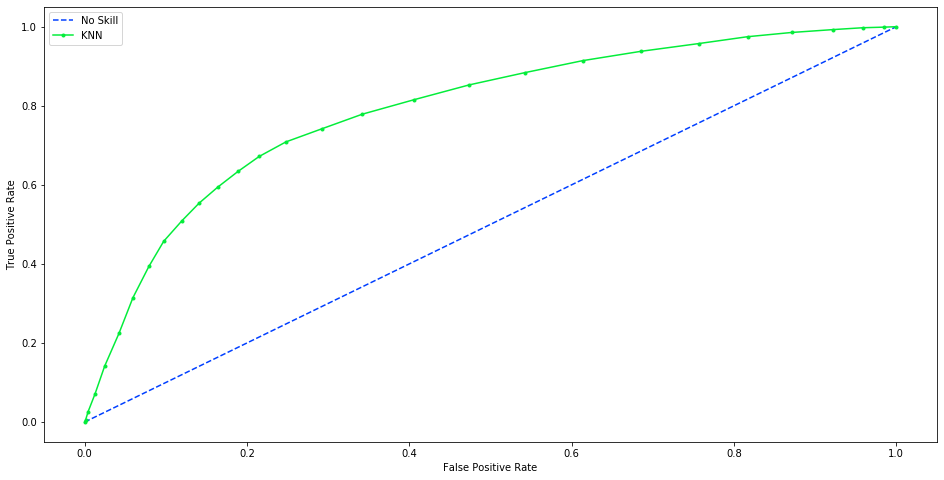

In [40]:
generate_roc(neigh,y_test,'KNN')

### Best model table

**Due to a higher accuracy score, we choose the grid search results as the best model**

In [124]:
Model_comparison_KNN = {'Model':['Baseline','Grid Search results'],
        'n_neighbors' :[5,27],            
        'weights':['uniform','uniform'],
        'algorithm':['auto','brute'],
        'p': [2,1],
        'Recall': [0.6988723374634553,0.6931922398589065],
        'Precision': [0.70,0.75],
        'Accuracy': [0.7086175692607546,0.7300176366843033]
       }
pd.DataFrame(Model_comparison_KNN)

,Model,n_neighbors,weights,algorithm,p,Recall,Precision,Accuracy
0,Baseline,5,uniform,auto,2,0.698872,0.70,0.708618
1,Grid Search results,27,uniform,brute,1,0.693192,0.75,0.730018


## Naive Bayes

**We ran this algorithm for three distributions, namely Gaussian,Multinomial and Bernoulli. The results of Bernoulli were extremely poor and have been omitted from the report**

In [41]:
X = df_one_hot.drop('Disease',axis = 1)
y = df_one_hot['Disease']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Gaussian

**The baseline model for gaussian naive bayes returns a recall of 0.56 and an accuracy of 0.68**

In [43]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
pred = gnb.predict(X_test)
gnb_pred = pred

In [45]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.64      0.80      0.71      6992
           1       0.74      0.56      0.64      7183

    accuracy                           0.68     14175
   macro avg       0.69      0.68      0.67     14175
weighted avg       0.69      0.68      0.67     14175

Accuracy Score:  0.676331569664903
Recall Score:  0.555895865237366


Predicted,0,1,All
True,,,
0,5594,1398,6992
1,3190,3993,7183
All,8784,5391,14175


### Multinomial

**The baseline model for multinomial naive bayes returns a recall of 0.65 and an accuracy of 0.71**

In [46]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
pred = mnb.predict(X_test)

In [48]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.68      0.77      0.73      6992
           1       0.75      0.65      0.70      7183

    accuracy                           0.71     14175
   macro avg       0.72      0.71      0.71     14175
weighted avg       0.72      0.71      0.71     14175

Accuracy Score:  0.7127336860670194
Recall Score:  0.6536266184045664


Predicted,0,1,All
True,,,
0,5408,1584,6992
1,2488,4695,7183
All,7896,6279,14175


## Optimization

**We will use Multinomial Naive Bayes for optimization since it has the best performance**

**The following grid search returns the hyperparameters which provide the best results with a recall of 0.65 and an accuracy of 0.71**

**The hyperparameters tuned are**
- **alpha: The value to be used for smoothing**
- **fit_prior: Whether to learn class prior probabilities or not.**

In [49]:
param_grid = {'alpha': list(range(1,9)),
              'fit_prior': [True,False]}

gs = GridSearchCV(MultinomialNB(), param_grid, scoring='accuracy',cv = 10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [50]:
print(gs.best_score_)

0.7061651498200949


In [51]:
for hps, values in gs.best_params_.items():
    print(f"{hps}: {values}")

alpha: 5
fit_prior: True


In [52]:
mnb = MultinomialNB(alpha=2.0,fit_prior= True)
mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)
mnb_pred = pred

In [53]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.68      0.77      0.73      6992
           1       0.75      0.65      0.70      7183

    accuracy                           0.71     14175
   macro avg       0.72      0.71      0.71     14175
weighted avg       0.72      0.71      0.71     14175

Accuracy Score:  0.7128042328042328
Recall Score:  0.6536266184045664


Predicted,0,1,All
True,,,
0,5409,1583,6992
1,2488,4695,7183
All,7897,6278,14175


### ROC Curve
**The ROC Curve can be seen below, it has an AUC value of 0.764**

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.764


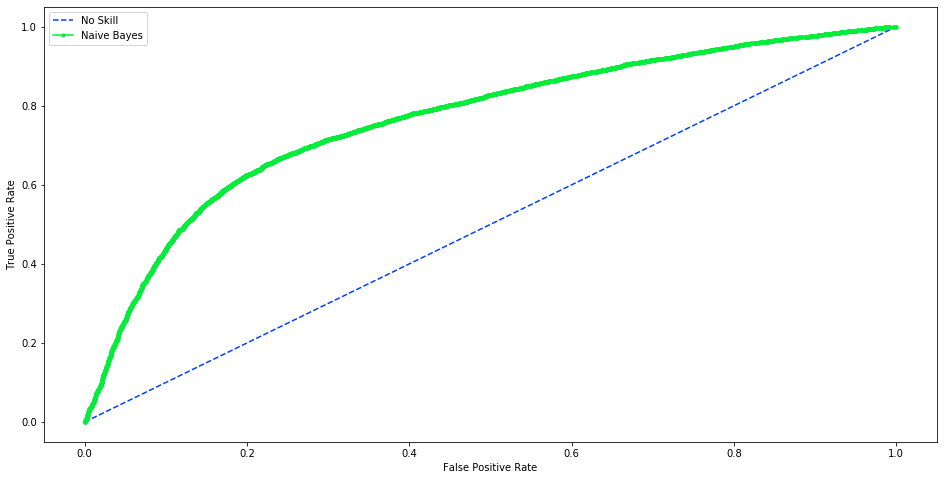

In [54]:
generate_roc(mnb,y_test,'Naive Bayes')

### Best model table

**Due to a higher accuracy score, we choose the grid search results as the best model**

In [122]:
Model_comparison_NB = {'Model':['Gaussian','Multinomial','Grid Search results'],
        'Distribution' :['Gaussian','Multinomial','Multinomial'],            
        'alpha':['N/A',1.0,2.0],
        'fit_prior':['N/A',True,True],
        'Recall': [0.555895865237366,0.6617012390366143,0.6536266184045664],
        'Precision': [0.74,0.75,0.75],
        'Accuracy': [0.676331569664903,0.7127336860670194,0.7128042328042328]
       }
pd.DataFrame(Model_comparison_NB)

,Model,Distribution,alpha,fit_prior,Recall,Precision,Accuracy
0,Gaussian,Gaussian,N/A,N/A,0.555896,0.74,0.676332
1,Multinomial,Multinomial,1,True,0.661701,0.75,0.712734
2,Grid Search results,Multinomial,2,True,0.653627,0.75,0.712804


## Random Forests

**The baseline model for random forests returns a recall of 0.66 and an accuracy of 0.69**

In [55]:
X = df_one_hot.drop('Disease',axis = 1)
y = df_one_hot['Disease']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
rfc = RandomForestClassifier(random_state=16)
rfc.fit(X_train, y_train)

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=16, verbose=0,
                       warm_start=False)

In [58]:
pred = rfc.predict(X_test)

In [59]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      6992
           1       0.70      0.66      0.68      7183

    accuracy                           0.69     14175
   macro avg       0.69      0.69      0.69     14175
weighted avg       0.69      0.69      0.69     14175

Accuracy Score:  0.6881128747795414
Recall Score:  0.6617012390366143


Predicted,0,1,All
True,,,
0,5001,1991,6992
1,2430,4753,7183
All,7431,6744,14175


## Optimization

**The following grid search returns the hyperparameters which provide the best results with a recall of 0.70 and an accuracy of 0.74**

**The hyperparameters tuned are**
- **n_estimators: The number of trees in the forest**
- **max_depth: Maximum number of levels that each decision tree can have**
- **min_samples_split: The minimum number of samples required to split an internal node in each decision tree**
- **criterion: The method used to measure the quality of a split**
- **min_samples_leaf: The minimum number of samples required to be at a leaf node.**
- **class_weight: Weights given to the class labels**

**Note: As grid search on random forest takes a long time to run, I have run grid search iteratively. Therefore, the parameters in the grid below are not a comprehensive list of all parameters tuned using grid search**

In [60]:
param_grid = {'n_estimators': [100],
              'max_depth': [10],
              'min_samples_split' :[8],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [4],
              'class_weight': ['balanced','balanced_subsample',None]
             }
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy',cv = 6,verbose=1)
gs.fit(X_train, y_train)

Fitting 6 folds for each of 6 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.3min finished


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [61]:
print(gs.best_score_)

0.7320472893296647


In [62]:
for hps, values in gs.best_params_.items():
    print(f"{hps}: {values}")

class_weight: None
criterion: entropy
max_depth: 10
min_samples_leaf: 4
min_samples_split: 8
n_estimators: 100


In [63]:
rfc = RandomForestClassifier(n_estimators = 100,max_depth = 10,min_samples_split = 8,criterion='gini',
                             min_samples_leaf= 4,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [64]:
pred = rfc.predict(X_test)
rf_pred = pred

In [65]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6992
           1       0.76      0.70      0.73      7183

    accuracy                           0.74     14175
   macro avg       0.74      0.74      0.74     14175
weighted avg       0.74      0.74      0.74     14175

Accuracy Score:  0.7387654320987654
Recall Score:  0.7004037310316024


Predicted,0,1,All
True,,,
0,5441,1551,6992
1,2152,5031,7183
All,7593,6582,14175


In [66]:
importances = rfc.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

**The importance of the features can be seen below**

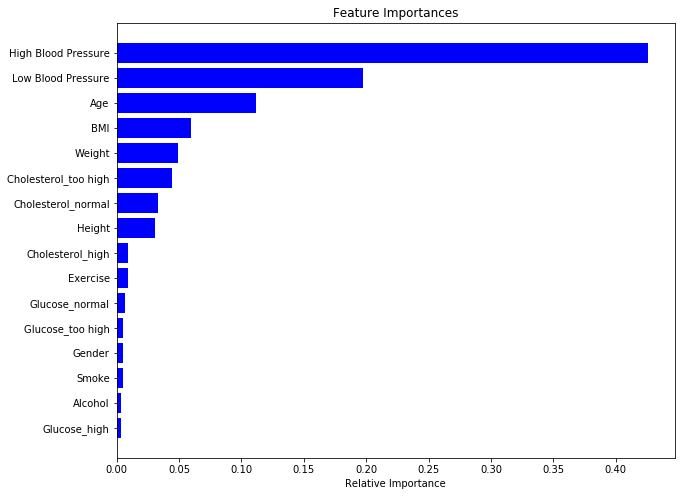

In [67]:
plt.figure(figsize = (10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### ROC Curve
**The ROC Curve can be seen below, it has an AUC value of 0.805**

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.805


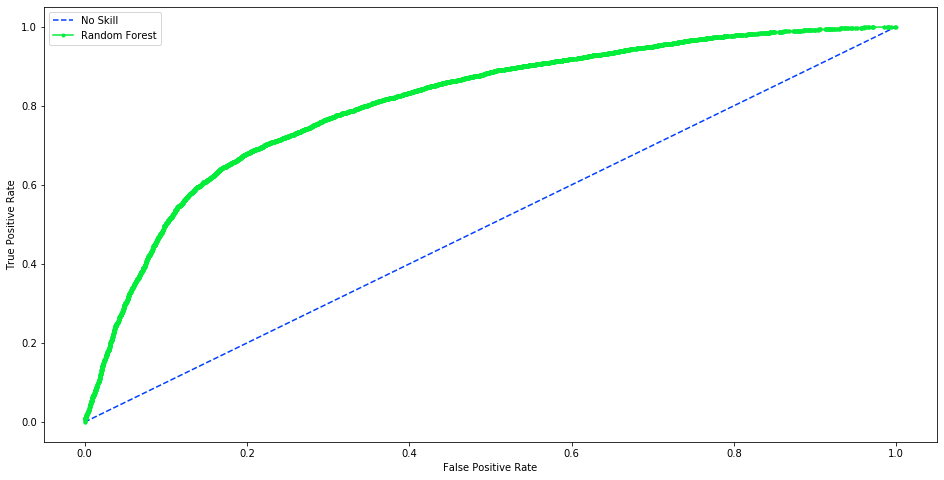

In [68]:
generate_roc(rfc,y_test,'Random Forest')

### Best model table

**Due to a higher recall and accuracy value, we choose the grid search results as the best model**

In [120]:
Model_comparison_RF = {'Model':['Baseline','Grid Search results'],
        'n_estimators' :['warn',100],            
        'max_depth':[None,10],
        'min_samples_split':[2,8],
        'criterion': ['gini','gini'],
        'min_samples_leaf': [1,4],
        'Recall': [0.6617012390366143,0.6881128747795414],
        'Precision': [0.70,0.76],
        'Accuracy': [0.7374955908289241,0.7387654320987654]
       }
pd.DataFrame(Model_comparison_RF)

,Model,n_estimators,max_depth,min_samples_split,criterion,min_samples_leaf,Recall,Precision,Accuracy
0,Baseline,warn,NaN,2,gini,1,0.661701,0.70,0.737496
1,Grid Search results,100,10.0,8,gini,4,0.688113,0.76,0.738765


## Gradient Boosting

**The baseline model for gradient boosting returns a recall of 0.71 and an accuracy of 0.74**

In [69]:
X = df_one_hot.drop('Disease',axis = 1)
y = df_one_hot['Disease']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
pred = gbm.predict(X_test)

In [73]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6992
           1       0.75      0.71      0.73      7183

    accuracy                           0.74     14175
   macro avg       0.74      0.74      0.74     14175
weighted avg       0.74      0.74      0.74     14175

Accuracy Score:  0.7374955908289241
Recall Score:  0.7136294027565084


Predicted,0,1,All
True,,,
0,5328,1664,6992
1,2057,5126,7183
All,7385,6790,14175


## Optimization

**The following grid search returns the hyperparameters which provide the best results with a recall of 0.72 and an accuracy of 0.74**

**The hyperparameters tuned are**
- **n_estimators: The number of trees in the forest**
- **max_depth: Maximum number of levels that each decision tree can have**
- **min_samples_split: The minimum number of samples required to split an internal node in each decision tree**
- **max_features: The number of features to consider when looking for the best split**
- **subsample: The fraction of samples to be used for fitting the individual base learners**
- **learning_rate: The value by which to shrink the contribution of each tree**

**Note: As grid search on random forest takes a long time to run, I have run grid search iteratively. Therefore, the parameters in the grid below are not a comprehensive list of all parameters tuned using grid search**

In [127]:
param_grid = {'n_estimators': [100],
              'max_depth': [3],
              'min_samples_split' : [7],
              'max_features':list(range(7,20,2)),
              'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
              'learning_rate': [0.05,0.1,0.15,0.2]
            }

gs = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='accuracy',cv = 6,verbose=1,n_jobs = 4)
gs.fit(X_train, y_train)

In [ ]:
print(gs.best_score_)

In [ ]:
for hps, values in gs.best_params_.items():
    print(f"{hps}: {values}")

In [74]:
gbm = GradientBoostingClassifier(n_estimators = 100,loss = 'deviance', learning_rate = 0.2,
                                 max_depth = 3, min_samples_split = 7,max_features=15, subsample=0.9,random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
pred = gbm.predict(X_test)
gbm_pred = pred

In [76]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6992
           1       0.75      0.72      0.73      7183

    accuracy                           0.74     14175
   macro avg       0.74      0.74      0.74     14175
weighted avg       0.74      0.74      0.74     14175

Accuracy Score:  0.73657848324515
Recall Score:  0.7173882778783238


Predicted,0,1,All
True,,,
0,5288,1704,6992
1,2030,5153,7183
All,7318,6857,14175


In [77]:
importances = gbm.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

**The importance of the features can be seen below**

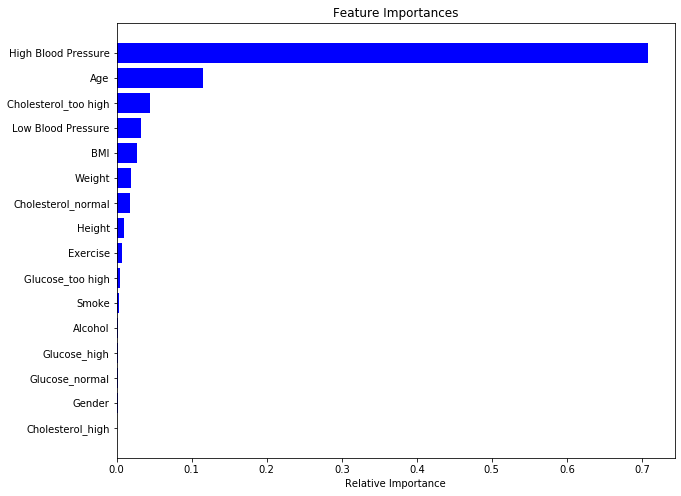

In [78]:
plt.figure(figsize = (10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### ROC Curve
**The ROC Curve can be seen below, it has an AUC value of 0.806**

No Skill: ROC AUC=0.500
Gradient Boosting: ROC AUC=0.806


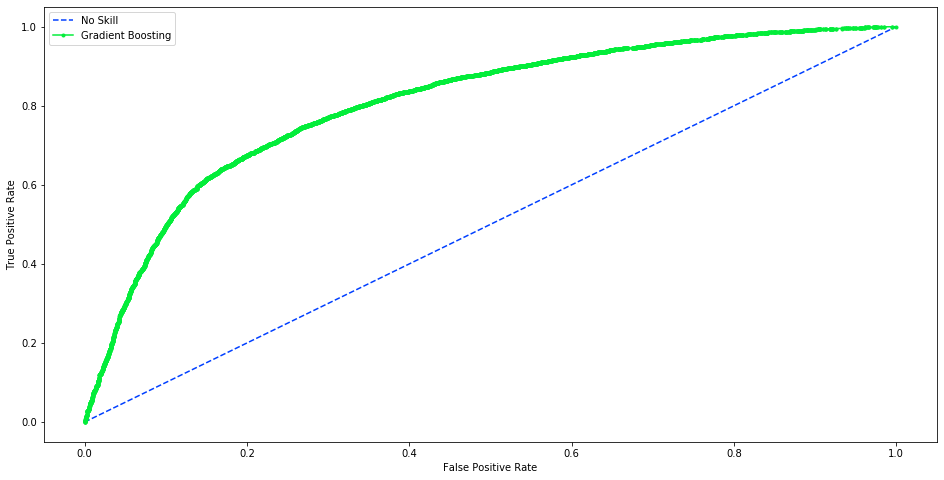

In [79]:
generate_roc(gbm,y_test,"Gradient Boosting")

### Best model table

**Due to a higher recall value, we choose the grid search results as the best model**

In [116]:
Model_comparison_GBM = {'Model':['Baseline','Grid Search results'],
        'n_estimators' :[100,100],            
        'loss':['deviance','deviance'],                              
        'learning_rate':[0.1,0.2],
        'max_depth':[3,3],
        'min_samples_split':[2,7],
        'max_features': ['None',15],
        'subsample': [1.0,0.9],
        'Recall': [0.7136294027565084,0.7173882778783238],
        'Precision': [0.75,0.75],
        'Accuracy': [0.7374955908289241,0.73657848324515]
       }
pd.DataFrame(Model_comparison_GBM)

,Model,n_estimators,loss,learning_rate,max_depth,min_samples_split,max_features,subsample,Recall,Precision,Accuracy
0,Baseline,100,deviance,0.1,3,2,None,1.0,0.713629,0.75,0.737496
1,Grid Search results,100,deviance,0.2,3,7,15,0.9,0.717388,0.75,0.736578


## Support Vector Machines

**We will run both linear and non linear support vector machines**

## Linear

**The baseline model for linear support vector machines returns a recall of 0.69 and an accuracy of 0.73**

In [80]:
X = df_standardized.drop('Disease',axis = 1)
y = df_standardized['Disease']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [82]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [83]:
pred = lin_clf.predict(X_test)

In [84]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6992
           1       0.76      0.69      0.72      7183

    accuracy                           0.73     14175
   macro avg       0.73      0.73      0.73     14175
weighted avg       0.73      0.73      0.73     14175

Accuracy Score:  0.7307936507936508
Recall Score:  0.6878741472922177


Predicted,0,1,All
True,,,
0,5418,1574,6992
1,2242,4941,7183
All,7660,6515,14175


### Optimization

**The following grid search returns the hyperparameters which provide the best results with a recall of 0.69 and an accuracy of 0.73**

**The hyperparameters tuned are**
- **C: The cost parameter of the support vector machine**
- **loss: The loss function to be used**
- **penalty: Determines whether to use l1 or l2 norm**
- **dual: Select the algorithm to either solve the dual or primal optimization problem**
- **max_iter: The maximum number of iterations to be run**

**Note 1: As grid search on random forest takes a long time to run, I have run grid search iteratively. Therefore, the parameters in the grid below are not a comprehensive list of all parameters tuned using grid search**

**Note 2: As LinearSVC() does not have a predict_proba function, we will not be plotting an ROC curve for this model**

In [152]:
param_grid = {'C': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8,0.9,1],
              'loss': ['squared_hinge'],
              'penalty': ['l1'],
              'dual': [False],
              'max_iter':list(range(1000,2001,200))
             }

gs = GridSearchCV(svm.LinearSVC(), param_grid, scoring='accuracy',cv = 6,verbose = 1)
gs.fit(X_train, y_train)

In [380]:
print(gs.best_score_)

0.7265443110694524


In [381]:
for hps, values in gs.best_params_.items():
    print(f"{hps}: {values}")

C: 0.3
dual: False
loss: squared_hinge
max_iter: 2000
penalty: l1


In [85]:
lin_clf = svm.LinearSVC(C = 0.3,dual = False,loss = 'squared_hinge',penalty = 'l1',max_iter= 2000,random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=2000,
          multi_class='ovr', penalty='l1', random_state=42, tol=0.0001,
          verbose=0)

In [86]:
pred = lin_clf.predict(X_test)
lin_clf_pred = pred

In [87]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6992
           1       0.76      0.69      0.72      7183

    accuracy                           0.73     14175
   macro avg       0.73      0.73      0.73     14175
weighted avg       0.73      0.73      0.73     14175

Accuracy Score:  0.7307936507936508
Recall Score:  0.688013364889322


Predicted,0,1,All
True,,,
0,5417,1575,6992
1,2241,4942,7183
All,7658,6517,14175


### Best model table

**Due to a higher recall value, we choose the grid search results as the best model**

In [114]:
Model_comparison_LinSVM = {'Model':['Baseline','Grid Search results'],
        'C' :[1.0,0.3],            
        'dual':[True,False],                              
        'loss':['squared_hinge','squared_hinge'],
        'penalty':['l2','l1'],
        'max_iter':[1000,2000],
        'Recall': [0.6878741472922177,0.688013364889322],
        'Precision': [0.76,0.76],
        'Accuracy': [0.7307936507936508,0.7307936507936508]
       }
pd.DataFrame(Model_comparison_LinSVM)

,Model,C,dual,loss,penalty,max_iter,Recall,Precision,Accuracy
0,Baseline,1.0,True,squared_hinge,l2,1000,0.687874,0.76,0.730794
1,Grid Search results,0.3,False,squared_hinge,l1,2000,0.688013,0.76,0.730794


## Non Linear

### RBF

**The baseline model for non linear support vector machines with RBF returns a recall of 0.69 and an accuracy of 0.74**

In [88]:
nlin_clf = svm.SVC(random_state=42)
nlin_clf.fit(X_train, y_train)

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [89]:
pred = nlin_clf.predict(X_test)

In [90]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6992
           1       0.76      0.69      0.73      7183

    accuracy                           0.74     14175
   macro avg       0.74      0.74      0.74     14175
weighted avg       0.74      0.74      0.73     14175

Accuracy Score:  0.7353791887125221
Recall Score:  0.6923291103995545


Predicted,0,1,All
True,,,
0,5451,1541,6992
1,2210,4973,7183
All,7661,6514,14175


### Polynomial

**The baseline model for non linear support vector machines with polynomial returns a recall of 0.65 and an accuracy of 0.72**

In [91]:
nlin_clf = svm.SVC(kernel='poly',random_state=42)
nlin_clf.fit(X_train, y_train)

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
pred = nlin_clf.predict(X_test)

In [93]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6992
           1       0.77      0.65      0.70      7183

    accuracy                           0.72     14175
   macro avg       0.73      0.72      0.72     14175
weighted avg       0.73      0.72      0.72     14175

Accuracy Score:  0.7227513227513227
Recall Score:  0.6468049561464569


Predicted,0,1,All
True,,,
0,5599,1393,6992
1,2537,4646,7183
All,8136,6039,14175


## Optimization

**The following grid search returns the hyperparameters which provide the best results with a recall of 0.70 and an accuracy of 0.73**

**The hyperparameters tuned are**
- **C: The cost parameter of the support vector machine**
- **gamma: The kernel function to be used to cast the model into a higher dimension**

**Note : As grid search on random forest takes a long time to run, I have run grid search iteratively. Therefore, the parameters in the grid below are not a comprehensive list of all parameters tuned using grid search**

In [398]:
param_grid = {'C': [0.7,0.75,0.8],
              'gamma': [0.25,0.3,0.35],
              'kernel': ['rbf']
             }

gs = GridSearchCV(SVC(), param_grid, scoring='accuracy',cv = 6,verbose = 1)
gs.fit(X_train, y_train)

In [ ]:
print(gs.best_score_)

In [ ]:
for hps, values in gs.best_params_.items():
    print(f"{hps}: {values}")

In [94]:
nlin_clf = svm.SVC(C = 0.8,gamma=0.25,random_state=42,probability=True)
nlin_clf.fit(X_train, y_train)

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [95]:
pred = nlin_clf.predict(X_test)
nlin_clf_pred = pred

In [96]:
print(classification_report(y_test,pred))
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Recall Score: ",recall_score(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      6992
           1       0.75      0.70      0.73      7183

    accuracy                           0.73     14175
   macro avg       0.73      0.73      0.73     14175
weighted avg       0.73      0.73      0.73     14175

Accuracy Score:  0.7311463844797178
Recall Score:  0.7030488653765836


Predicted,0,1,All
True,,,
0,5314,1678,6992
1,2133,5050,7183
All,7447,6728,14175


### ROC Curve
**The ROC Curve can be seen below, it has an AUC value of 0.786**

No Skill: ROC AUC=0.500
Non Linear SVM: ROC AUC=0.786


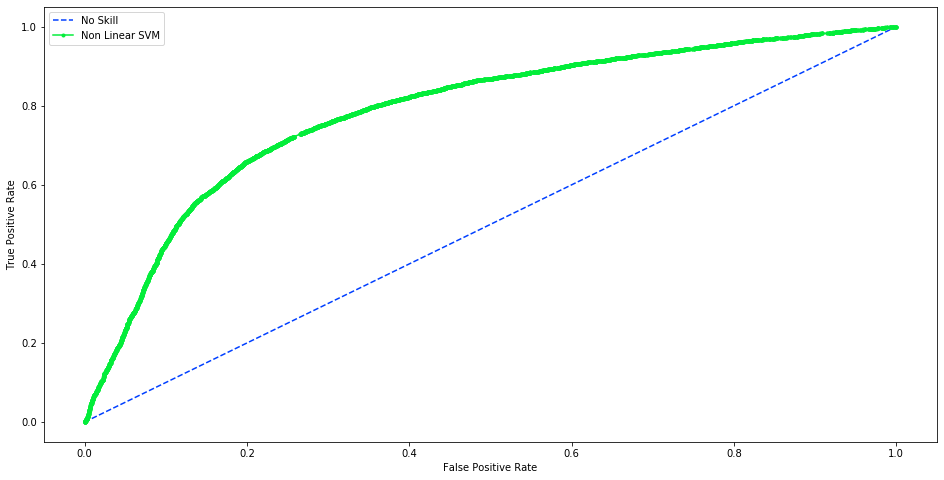

In [97]:
generate_roc(nlin_clf,y_test,"Non Linear SVM")

### Best model table

**We have selected the outcome of the grid search as the best model because we're trying to maximize recall and accuracy**

In [110]:
Model_comparison_NLinSVM = {'Model':['RBF SVM','Polynomial SVM','Grid Search results'],
        'C' :[1.0,1.0,0.8],            
        'gamma':['auto_deprecated','auto_deprecated','0.25'],                              
        'kernel':['rbf','poly','rbf'],
        'Recall': [0.69,0.65,0.70],
        'Precision': [0.76,0.77,0.75],
        'Accuracy': [0.74,0.72,0.73]
       }
pd.DataFrame(Model_comparison_NLinSVM)

,Model,C,gamma,kernel,Recall,Precision,Accuracy
0,RBF SVM,1.0,auto_deprecated,rbf,0.69,0.76,0.74
1,Polynomial SVM,1.0,auto_deprecated,poly,0.65,0.77,0.72
2,Grid Search results,0.8,0.25,rbf,0.70,0.75,0.73


# Majority Voting

**In the spirit of ensemble learning, let's apply majority voting to 7 classifiers to see if it improves results**

**Majority Voting returns an accuracy of 0.74 and a recall of 0.70**

In [98]:
maj_pred = []
for i in range(len(y_test)):
    vote = 0
    if neigh_pred[i] == 1:
        vote+= 1
    if mnb_pred[i] == 1:
        vote+= 1
    if rf_pred[i]== 1:
        vote+= 1
    if gbm_pred[i] == 1:
        vote+= 1
    if nlin_clf_pred[i] == 1:
        vote+= 1
    if lin_clf_pred[i] == 1:
        vote+= 1
    if gnb_pred[i] == 1:
        vote+= 1
    if vote > 3:
        maj_pred.append(1)
    else:
        maj_pred.append(0)

In [99]:
print(classification_report(y_test,maj_pred))
print("Accuracy Score: ",accuracy_score(y_test,maj_pred))
print("Recall Score: ",recall_score(y_test,maj_pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6992
           1       0.76      0.70      0.73      7183

    accuracy                           0.74     14175
   macro avg       0.74      0.74      0.74     14175
weighted avg       0.74      0.74      0.74     14175

Accuracy Score:  0.7369312169312169
Recall Score:  0.6959487679242656


Predicted,0,1,All
True,,,
0,5314,1678,6992
1,2133,5050,7183
All,7447,6728,14175


# Test Data Predictions

## K Nearest Neighbor

In [100]:
knn_pred = neigh.predict(df_test_normalized.drop('ID',axis = 1))
knn_pred

array([0., 0., 1., ..., 0., 1., 0.])

## Naive Bayes

In [101]:
nb_pred = mnb.predict(df_test_one_hot.drop('ID',axis = 1))
nb_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## Random Forest

In [102]:
rf_pred = rfc.predict(df_test_one_hot.drop('ID',axis = 1))
rf_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

## Gradient Boosting

In [103]:
gb_pred = gbm.predict(df_test_one_hot.drop('ID',axis = 1))
gb_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

## Linear SVM

In [104]:
linsvm_pred = lin_clf.predict(df_test_standardized.drop('ID',axis = 1))
linsvm_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

## Non Linear SVM

In [105]:
nlinsvm_pred = nlin_clf.predict(df_test_standardized.drop('ID',axis = 1))
nlinsvm_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Exporting Training Data

In [106]:
data1 = {
    'ID' : df_testing.ID,
    'NBC': nb_pred,
    'KNN': knn_pred,
    'SVM-Linear' : linsvm_pred,
    'SVM-RBF' : nlinsvm_pred,
    'RF' : rf_pred,
    'GBM': gb_pred
}

final_result = pd.DataFrame(data1)
final_result['KNN'] = final_result['KNN'].astype('int')
final_result.head()

,ID,NBC,KNN,SVM-Linear,SVM-RBF,RF,GBM
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,1,1,0,1,1
3,3,1,1,1,1,1,1
4,4,0,0,0,0,0,0


In [107]:
final_result.to_csv('final.csv',index = False)

# Conclusion

**In conclusion, all the algorithms work fairly well with accuracy's ranging between 70-74 percent. We find that preprocessing steps such as dropping duplicate values have a big impact on the performance of the models. We find that attributes such as low blood pressure, high blood pressure and age play a big role in predicting whether or not a patient has a disease. The feature engineering process also proved fruitful as the BMI attribute proved to be an important feature. Overall gradient boosting provides the best performance in terms of accuracy and recall**